# **KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU**

---

# I. THU THẬP DỮ LIỆU

- Chủ đề dữ liệu: Renewable Energy and Weather Conditions (Năng lượng tái tạo và điều kiện thời tiết)
- Nguồn dữ liệu: Dữ liệu được download từ trang web `Kaggle` và lưu vào google drive dưới dạng file csv
- Link dataset: [Renewable Energy and Weather Conditions](https://www.kaggle.com/datasets/samanemami/renewable-energy-and-weather-conditions)

# II. KHÁM PHÁ DỮ LIỆU

Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_colwidth', 100) 
pd.set_option('display.max_columns', None) 

Đọc dữ liệu từ đường dẫn gg drive

In [2]:
with open('../Datasets/solar_weather_link.txt') as f:
    link = f.readline()

FILE_ID = link.split("/d/")[1].split("/view")[0]

In [3]:
url = f'https://drive.google.com/uc?id={FILE_ID}&export=download'
df = pd.read_csv(url)
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


### 1. Dữ liệu có bao nhiêu dòng, cột? 

In [4]:
df.shape

(196776, 17)

### 2. Thông tin về các dòng dữ liệu

#### 2.1 Ý nghĩa từng dòng dữ liệu

- Mỗi dòng là đại diện cho thông tin chi tiết tại một thời điểm nhất định bao gồm thời điểm dữ liệu được ghi lại, các thông số thời tiết (như nhiệt độ, tốc độ gió, độ ẩm, ...) và sản lượng năng lượng tái tạo được tạo ra tại thời điểm đó.

- Không có dòng nào có ý nghĩa khác với các dòng còn lại.

#### 2.2 Kiểm tra các dòng dữ liệu trùng lặp

In [5]:
n_duplicate = df.duplicated().sum()
print(f"Số dòng dữ liệu bị trùng lặp: {n_duplicate}")

Số dòng dữ liệu bị trùng lặp: 0


### 3. Thông tin về các cột dữ liệu

Dữ liệu có các cột sau

In [6]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

#### 3.1 Ý nghĩa của các cột dữ liệu

Theo mô tả dữ liệu trên Kaggle, mỗi cột có ý nghĩa như sau:
|Tên cột|Ý nghĩa|
|-------|-------|
| Time| Thời gian ghi nhận dữ liệu theo định dạng ngày và giờ|
| Energy delta[Wh]| Chênh lệch về mức tiêu thụ năng lượng (Watt-hour) từ mốc thời gian trước đến thời gian hiện tại|
| GHI| Bức xạ mặt trời toàn cầu trên bề mặt ngang (W/m²)|
| temp| Nhiệt độ không khí (°C)|
| pressure| Áp suất khí quyển (hPa)|
| humidity| Độ ẩm không khí (%)|
| wind_speed| Tốc độ gió (m/s)|
| rain_1h| Lượng mưa trong giờ qua (mm)|
| snow_1h| Lượng tuyết rơi (mm)|
| clouds_all| Tỷ lệ che phủ của mây (%)|
| isSun| Cho biết có ánh sáng mặt trời tại thời điểm đó hay không|
| sunlightTime| Tổng thời gian có ánh sáng mặt trời trong ngày (phút)|
| dayLength| Độ dài ngày tính từ lúc mặt trời mọc cho đến lúc mặt trời lặn (phút)|
| SunlightTime/daylength| Tỷ lệ thời gian có ánh sáng mặt trời so với tổng thời gian ban ngày|
| weather_type| Loại thời tiết (trời quang, nhiều mây hoặc mưa)|
| hour| Giờ trong ngày (0-23)|
| month| Tháng trong năm (1-12)|

Ý nghĩa thông số trong cột **weather_type**:
 - 1: (clear) trời quang, bầu trời không có mây hoặc mây cực ít
 - 2: (partly cloudy), mây phủ một phần bầu trời, nhưng không nhiều
 - 3: (cloudy) trời nhiều mây
 - 4: (overcast) mây phủ hoàn toàn
 - 5: (rainy), điều kiện thời tiết có gió mạnh, có thể có mưa hoặc tuyết  

#### 3.2 Kiểm tra kiểu dữ liệu của mỗi cột 

Kiểu dữ liệu hiện tại của các cột

In [7]:
column_types = df.dtypes
column_types

Time                       object
Energy delta[Wh]            int64
GHI                       float64
temp                      float64
pressure                    int64
humidity                    int64
wind_speed                float64
rain_1h                   float64
snow_1h                   float64
clouds_all                  int64
isSun                       int64
sunlightTime                int64
dayLength                   int64
SunlightTime/daylength    float64
weather_type                int64
hour                        int64
month                       int64
dtype: object

- Nhận xét: 
    + Trong dataframe, cột **isSun** và cột **weather_type** có kiểu int64, tuy nhiên theo ý nghĩa của từng cột mà nhóm đã tìm hiểu thì 2 cột này nên có kiểu phân loại, với cột **isSun** là `boolean` và cột **weather_type** là `category`. 
    
    + Mặt khác, cột **Time** có dữ liệu thời gian nhưng hiện tại nó đang có kiểu object. Nhóm sẽ đổi kiểu dữ liệu về `datetime`.

In [8]:
# Đổi kiểu dữ liệu của isSun
df['isSun'] = df['isSun'].astype('category')

In [9]:
# Đổi kiểu dữ liệu của weather_type
df['weather_type'] = df['weather_type'].astype('category')

In [10]:
# Đổi kiểu dữ liệu của Time
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# Kiểm tra lại
df.dtypes

Time                      datetime64[ns]
Energy delta[Wh]                   int64
GHI                              float64
temp                             float64
pressure                           int64
humidity                           int64
wind_speed                       float64
rain_1h                          float64
snow_1h                          float64
clouds_all                         int64
isSun                           category
sunlightTime                       int64
dayLength                          int64
SunlightTime/daylength           float64
weather_type                    category
hour                               int64
month                              int64
dtype: object

- Nhận xét: Dữ liệu trong dataframe đã được xác định với các kiểu dữ liệu phù hợp cho từng cột.

#### 3.3 Tiền xử lý dữ liệu chuỗi thời gian

##### 3.3.1 Kiểm tra dữ liệu chuỗi thời gian có bị trùng không?

In [12]:
duplicated_time = df['Time'].duplicated().any()
duplicated_time

False

- Nhận xét: Dữ liệu của cột **Time** là phân biệt và duy nhất nên nhóm sẽ đặt các giá trị này làm index cho tập dữ liệu. Điều này sẽ dễ dàng hơn cho việc phân tích dữ liệu chuỗi thời gian.

In [13]:
if 'Time' in df.columns:
    df = df.set_index('Time')
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Time,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


##### 3.3.2 Xác định các mốc thời gian bị thiếu

- Để xác định dữ liệu có bị thiếu thời gian nào hay không, nhóm sẽ tạo 1 khung thời gian đầy đủ từ thời gian đầu tới thời gian cuối của khảo sát, mỗi mốc thời gian cách nhau 15 phút (theo quan sát về 5 dòng đầu của dữ liệu) và so sánh với thời gian đo thực tế.

In [14]:
start_time = df.index.min()
end_time = df.index.max()
print(f"Thời gian thu thập các quan sát: {start_time} - {end_time}")

Thời gian thu thập các quan sát: 2017-01-01 00:00:00 - 2022-08-31 17:45:00


In [15]:
full_time_range = pd.date_range(start=start_time, end=end_time, freq='15T')

missing_times = set(full_time_range) - set(df.index)
print(f"Số lượng thời gian bị thiếu: {len(missing_times)}, chiếm tỉ lệ: {len(missing_times)/len(full_time_range)}")

Số lượng thời gian bị thiếu: 1824, chiếm tỉ lệ: 0.00918429003021148


- Vậy là có khoảng 0,01% khoảng thời gian các quan sát không được ghi nhận. Vì tỉ lệ này rất nhỏ, cộng thêm việc hầu hết dữ liệu thay đổi theo thời gian nên nhóm thực hiện phương pháp điền dữ liệu bằng `interpolate` theo thời gian cho các cột kiểu số và `ffill` cho các cột kiểu phân loại. 

In [16]:
df = df.reindex(full_time_range)
df.sort_index()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
2017-01-01 00:00:00,0.0,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0,0.0,450.0,0.00,4,0.0,1.0
2017-01-01 00:15:00,0.0,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0,0.0,450.0,0.00,4,0.0,1.0
2017-01-01 00:30:00,0.0,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0,0.0,450.0,0.00,4,0.0,1.0
2017-01-01 00:45:00,0.0,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0,0.0,450.0,0.00,4,0.0,1.0
2017-01-01 01:00:00,0.0,0.0,1.7,1020.0,100.0,5.2,0.0,0.0,100.0,0,0.0,450.0,0.00,4,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 16:45:00,118.0,23.7,18.6,1023.0,57.0,3.8,0.0,0.0,52.0,1,780.0,825.0,0.95,3,16.0,8.0
2022-08-31 17:00:00,82.0,15.6,18.5,1023.0,61.0,4.2,0.0,0.0,60.0,1,795.0,825.0,0.96,3,17.0,8.0
2022-08-31 17:15:00,51.0,8.0,18.5,1023.0,61.0,4.2,0.0,0.0,60.0,1,810.0,825.0,0.98,3,17.0,8.0
2022-08-31 17:30:00,24.0,2.1,18.5,1023.0,61.0,4.2,0.0,0.0,60.0,1,825.0,825.0,1.00,3,17.0,8.0


In [17]:
# Điền dữ liệu bằng phương pháp interpolate cho các cột kiểu số
interpolate_cols = df.select_dtypes(include='number').columns
df[interpolate_cols] = df[interpolate_cols].interpolate(method='time', axis = 0)

In [18]:
# Điền dữ liệu bằng phương pháp ffill cho các cột kiểu phân loại
ffill_cols = df.select_dtypes(include=['category', 'object']).columns
df[ffill_cols] = df[ffill_cols].fillna(method='ffill')

##### 3.3.3 Kiểm tra giá trị cột **hour** và **month** so với index 

- Hai cột **hour** và **month** là thông tin về giờ và tháng của thời điểm đo (cột **Time** trong dữ liệu gốc, hiện tại là index). Hai cột này phụ thuộc vào index, nên điều cần thiết là phải kiểm tra xem giá trị của nó có chính xác không, nếu không cần tiến hành sửa lỗi.

In [19]:
def check_hour(data = pd.DataFrame):
    if not (data.index.hour == data['hour']).all():
        print("Dữ liệu cột 'hour' sai so với index")
    else:
        print("Dữ liệu cột 'hour' đã chuẩn.")

def check_month(data = pd.DataFrame):
    if not (data.index.month == data['month']).all():
        print("Dữ liệu cột 'month' sai so với index")
    else:
        print("Dữ liệu cột 'month' đã chuẩn.")

check_hour(df)
check_month(df)

Dữ liệu cột 'hour' sai so với index
Dữ liệu cột 'month' đã chuẩn.


- Sửa lại giá trị của cột **hour** là hour trong index

In [20]:
df['hour'] = df.index.hour
check_hour(df)

Dữ liệu cột 'hour' đã chuẩn.


#### 3.4 Sự phân bố dữ liệu của các cột có kiểu định lượng

- Các cột có kiểu dữ liệu định lượng

In [21]:
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()
print('Numberical columns: ')
for col_name in numerical_columns:
    print(col_name)

Numberical columns: 
Energy delta[Wh]
GHI
temp
pressure
humidity
wind_speed
rain_1h
snow_1h
clouds_all
sunlightTime
dayLength
SunlightTime/daylength
hour
month


- Trong số các cột kiểu số, nhóm nhận thấy cột **SunlightTime/daylength** là biến phụ thuộc, cụ thể là phụ thuộc vào giá trị của 2 cột **sunlightTime** và **daylength**. Vì vậy nhóm sẽ thực hiện kiểm tra xem dữ liệu của cột này có chính xác không và thực hiện điều chỉnh cột **SunlightTime/daylength** nếu sai sót trước khi tìm hiểu sự phân bố dữ liệu.

In [22]:
if ((df['sunlightTime']/ df['dayLength']).round(2) != df['SunlightTime/daylength']).all():
    print('Dữ liệu của cột SunlightTime/daylength không chính xác')
else:
    print('Dữ liệu của cột SunlightTime/daylength chính xác')

Dữ liệu của cột SunlightTime/daylength chính xác


- Sự phân bố dữ liệu của các cột: Từ mô tả của dữ liệu và đánh giá sơ bộ, nhóm nhận thấy rằng ngoại trừ cột **hour** và **month** thì các cột còn lại đều có phân phối liên tục. Vì vậy nhóm sẽ sử dụng biểu đồ `histogram` để trực quan hóa phân bố giá trị của các cột có phân phối liên tục và `bar chart` cho 2 cột có phân phối rời rạc. 

In [23]:
# Danh sách các cột tương ứng với histogram
histogram_columns = numerical_columns[:-2]
bar_columns = numerical_columns[12:]

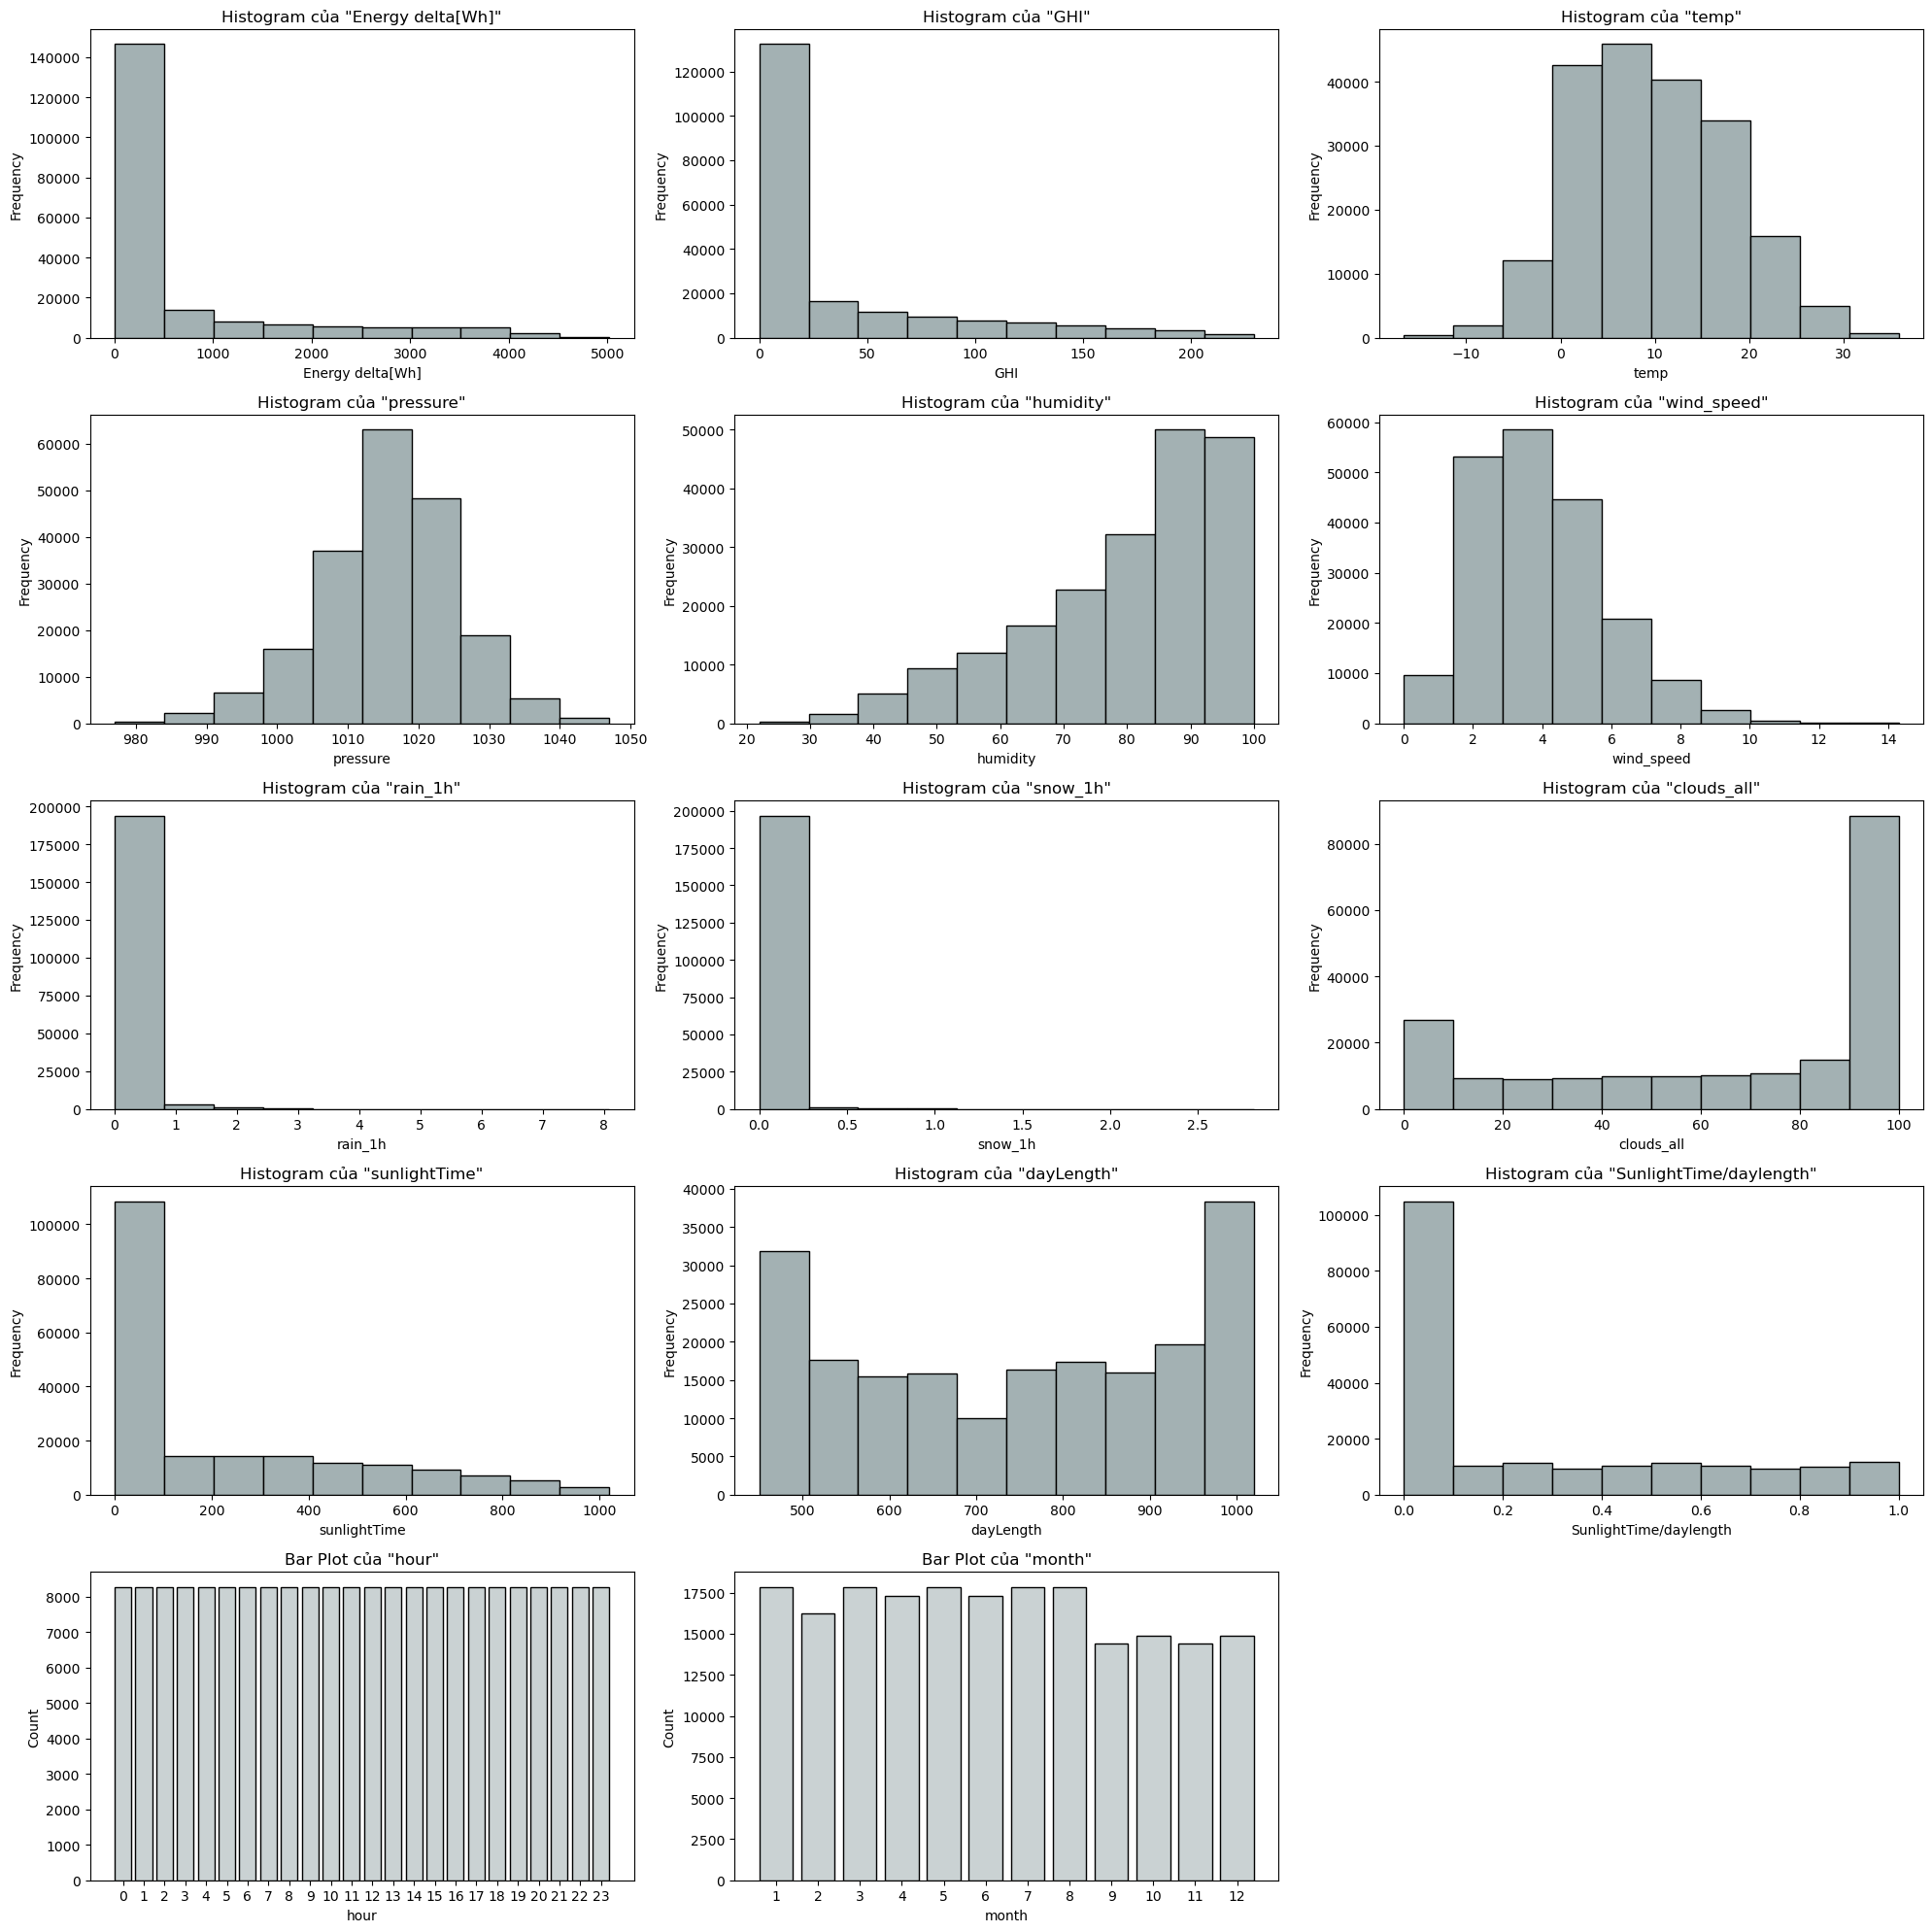

In [24]:
# Vẽ biểu đồ phân bố giá trị của các cột
numerical_fig, numerical_axes = plt.subplots(5, 3, figsize=(20, 20))

for i, col_name in enumerate(histogram_columns):
    ax = numerical_axes[i // 3, i % 3]  
    ax.hist(df[col_name].dropna(), bins=10, color = '#A3B1B3', edgecolor='black')
    ax.set_title(f'Histogram của "{col_name}"')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Frequency')

for i, col_name in enumerate(bar_columns, start=12):  
    ax = numerical_axes[i // 3, i % 3]  
    value_counts = df[col_name].value_counts().sort_index()
    ax.bar(value_counts.index, value_counts.values, color='#CAD2D3', edgecolor='black')
    ax.set_title(f'Bar Plot của "{col_name}"')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')
    ax.set_xticks(value_counts.index) # Đặt giới hạn trục x nếu cần để phù hợp với tất cả các giá trị

numerical_axes[4, 2].axis('off')

plt.tight_layout()
plt.show()


- Nhận xét: Từ hình vẽ ta thấy cột **rain_1h** và **snow_1h** lệch phải nghiêm trọng vì các giá trị trong những cột này chủ yếu là 0. Nhóm nhận thấy thông tin 2 cột này không cung cấp thông tin hữu ích và có thể gây nhiễu cho việc phân tích các câu hỏi của nhóm nên quyết định xóa nó. Việc loại bỏ những cột không cần thiết giúp tối ưu hóa bộ dữ liệu và giảm bớt sự phức tạp khi thực hiện các bước phân tích sau này.

In [25]:
df.drop(['rain_1h', 'snow_1h'], axis=1, inplace=True)
numerical_columns.remove('rain_1h')
numerical_columns.remove('snow_1h')

##### 3.3.1 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [26]:
for col_name in numerical_columns:
    print(f'{col_name}: {df[col_name].isnull().mean()*100}%')

Energy delta[Wh]: 0.0%
GHI: 0.0%
temp: 0.0%
pressure: 0.0%
humidity: 0.0%
wind_speed: 0.0%
clouds_all: 0.0%
sunlightTime: 0.0%
dayLength: 0.0%
SunlightTime/daylength: 0.0%
hour: 0.0%
month: 0.0%


- Nhận xét: Dữ liệu trong các cột dữ liệu dạng định lượng (numerical columns) của dataframe không có bất kỳ giá trị nào bị thiếu. 

##### 3.3.2 Tính toán các giá trị thống kê 

In [27]:
numerical_statistic = df.describe()
numerical_statistic

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,hour,month
count,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000,198600.000000
mean,567.745554,32.297162,9.721871,1015.241994,79.867895,3.959249,66.123263,209.776586,746.593958,0.262751,11.498912,6.288822
std,1041.450438,52.024893,8.002829,9.617048,15.563448,1.842534,36.541327,273.388535,195.524908,0.328485,6.921890,3.395433
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,34.000000,0.000000,570.000000,0.000000,5.000000,3.000000
50%,0.000000,0.900000,9.200000,1016.000000,84.000000,3.700000,83.000000,30.000000,765.000000,0.040000,11.000000,6.000000
75%,564.000000,46.000000,15.600000,1021.000000,92.000000,5.100000,100.000000,390.000000,930.000000,0.520000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,100.000000,1020.000000,1020.000000,1.000000,23.000000,12.000000


* Nhận xét:

    - Giá trị cột 'Energy delta[Wh]' và cột 'GHI' có giá trị max hơn hơn nhiều lần so với phân vị thứ 3, kết hợp với hình vẽ cho thấy dữ liệu lệch phải rõ rệt hơn nữa còn có khá nhiều outlier. Điều này có thể do thời điểm đo rơi vào các điều kiện thời tiết đặc biệt, là kết quả của các sự kiện thực tế và có thể phản ánh một phần của hiện tượng tự nhiên hoặc xu hướng. Vì vậy nhóm quyết định giữ lại các outliers này.

    - Ngoài ra, các giá trị còn lại không có bất thường quá rõ ràng, có thể tiếp tục thực hiện phân tích.

- Nhận xét: 
    + Các cột như Temp, Pressure, Humidity, Wind Speed, Clouds_all, và SunlightTime có thể chứa một số ít giá trị outlier (dưới 5%), nhưng đa phần là hợp lý trong ngữ cảnh nghiên cứu.
    + Các cột Enery delta[Wh] và GHI có số giá trị outlier đáng kể

#### 3.5 Sự phân bố giá trị của các cột có kiểu định tính

- Các cột có kiểu dữ liệu định tính

In [28]:
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print('Categorical columns: ')
for col_name in categorical_columns:
    print(col_name)

Categorical columns: 
isSun
weather_type


##### 3.5.1 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [29]:
for col_name in categorical_columns:
    missing_rate = df[col_name].isnull().mean() * 100
    print(f'{col_name}: {missing_rate:.2f}%')

isSun: 0.00%
weather_type: 0.00%


- Nhận xét: Dữ liệu trong các cột dữ liệu dạng định tính (categorical columns) của dataframe không có bất kỳ giá trị nào bị thiếu. 

##### 3.5.2 Số giá trị phân biệt của mỗi cột

In [30]:
def flatten_categorical_stats(df, categorical_columns):
    rows = []
    
    for col in categorical_columns:
        total = len(df[col])
        #value_count = compute_distribution(df, col)
        counts = df[col].value_counts(dropna=False).sort_index()
        percentages = (counts / total * 100).round(2)
        
        # tạo các hàng cho từng giá trị của từng cột
        for value, count, percentage in zip(counts.index, counts.values, percentages.values):
            row = {
                'column': col,
                'value': value,
                'count': count,
                'percentage': percentage
            }
            rows.append(row)
    
    result_df = pd.DataFrame(rows)
    return result_df


In [31]:
cat_col_distribution = flatten_categorical_stats(df, categorical_columns)
cat_col_distribution

,column,value,count,percentage
0,isSun,0,96284,48.48
1,isSun,1,102316,51.52
2,weather_type,1,27976,14.09
3,weather_type,2,35716,17.98
4,weather_type,3,31756,15.99
5,weather_type,4,74348,37.44
6,weather_type,5,28804,14.50


##### 3.5.3 Trực quan hóa cho phân bố dữ liệu của các cột kiểu phân loại

In [32]:
# Hàm tính toán sự phân bố các giá trị
def compute_distribution(dataframe, column):
    value_counts = dataframe[column].value_counts(dropna=False).sort_index() 
    db = {}
    for value, count in value_counts.items():
        db[value] = count
    
    return db

cat_distribution = {}

for column in categorical_columns:
    cat_distribution[column] = compute_distribution(df, column)

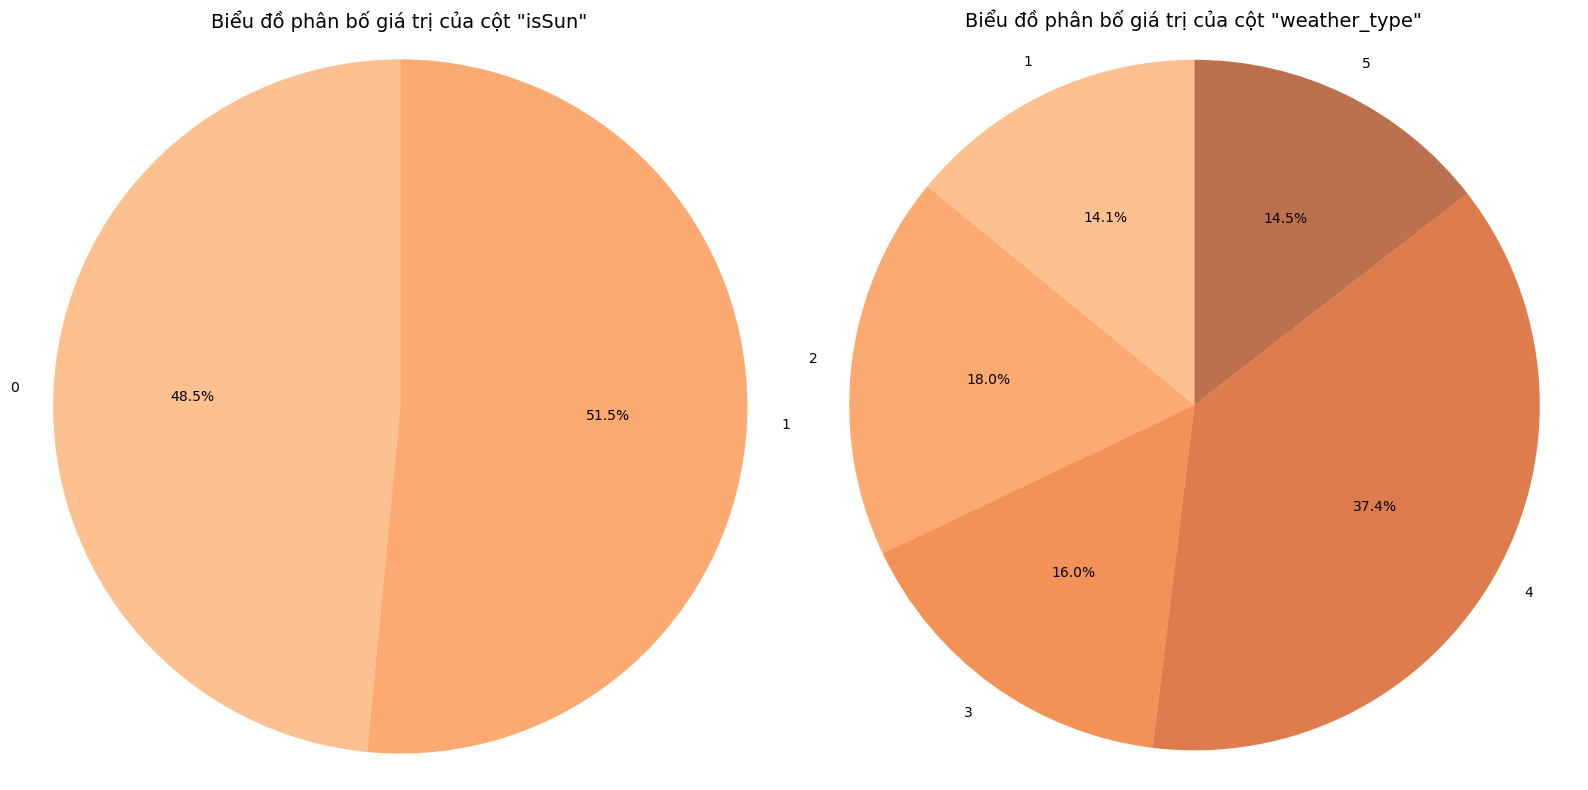

In [33]:
# Vẽ biểu đồ tròn cho các cột phân loại
numerical_fig, numerical_axes = plt.subplots(1, 2, figsize=(16, 8))
numerical_axes = numerical_axes.flatten()

# Tạo dải màu cam nhạt dần với độ trong suốt (alpha = 70%)
base_colors = plt.cm.Oranges(np.linspace(0.4, 1.5, 10))
transparent_colors = [[*color[:3], 0.7] for color in base_colors]

for i, (column, distribution) in enumerate(cat_distribution.items()):
    labels = list(distribution.keys())
    counts = list(distribution.values())

    numerical_axes[i].pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=transparent_colors[:len(labels)]
    )
    numerical_axes[i].axis('equal')
    numerical_axes[i].set_title(f'Biểu đồ phân bố giá trị của cột "{column}"', fontsize=14)


plt.tight_layout()
plt.show()

Sau các bước tiền xử lý, ta thực hiện lưu dataframe này vào 1 file mới trong gg drive và lưu đường dẫn trong file solar_weather_clean.txt.

In [36]:
# df.to_csv('../Datasets/solar_weather_clean.csv',index = True, index_label='Time')